In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
 
 
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
df = pd.read_csv('train.csv', sep = ';')
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
8615,27,admin.,single,secondary,no,295,yes,no,unknown,3,jun,148,13,-1,0,unknown,no
31394,46,management,married,tertiary,no,11385,no,no,cellular,24,mar,269,3,-1,0,unknown,yes
33841,42,admin.,married,secondary,no,71,yes,yes,cellular,28,apr,165,3,-1,0,unknown,no
4160,49,blue-collar,married,primary,no,284,yes,no,unknown,19,may,81,1,-1,0,unknown,no
30038,36,technician,married,secondary,no,627,no,yes,cellular,4,feb,146,3,244,1,other,no


In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

## Descriptive statistic

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [ ]:
#mapping y jadi angka dan menambahkan kolom ID
mapping={'yes':1,
         'no':0}
df['target']=df['y'].map(mapping)
df.insert(0, 'New_ID', range(1, 1 + len(df)))

1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
"blue-collar","self-employed","retired","technician","services")
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
9. contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
17. y - has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
df.sample(5)

,New_ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,target
9048,9049,60,housemaid,married,tertiary,no,443,no,no,unknown,5,jun,60,1,-1,0,unknown,no,0
23241,23242,42,technician,divorced,tertiary,no,765,no,no,cellular,27,aug,78,8,-1,0,unknown,no,0
1707,1708,49,self-employed,married,tertiary,no,1842,yes,no,unknown,9,may,124,2,-1,0,unknown,no,0
44334,44335,77,retired,married,secondary,no,4112,no,no,telephone,29,jul,426,1,184,3,success,yes,1
31400,31401,24,student,single,secondary,no,1250,no,no,cellular,25,mar,411,2,-1,0,unknown,yes,1


In [ ]:
round(df.describe(),2)

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


In [ ]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
(df['y'].value_counts()/df['y'].count())*100

no     88.30152
yes    11.69848
Name: y, dtype: float64

# Univariate Analysis

In [ ]:
nums = ['age','balance','campaign','pdays','previous','duration']
cats = ['job','marital','education','contact','poutcome']
cats2=['default','housing','loan']
#untuk heatmap
nums2 = ['age','balance','campaign','pdays','previous','duration','target']


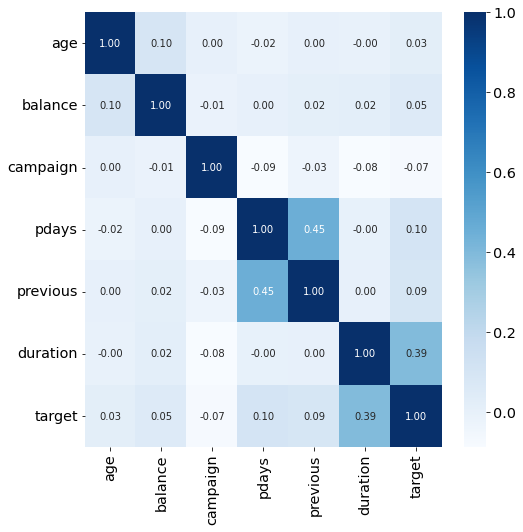

In [ ]:

plt.figure(figsize=(8, 8))
sns.heatmap(df[nums2].corr(), cmap='Blues', annot=True, fmt='.2f')

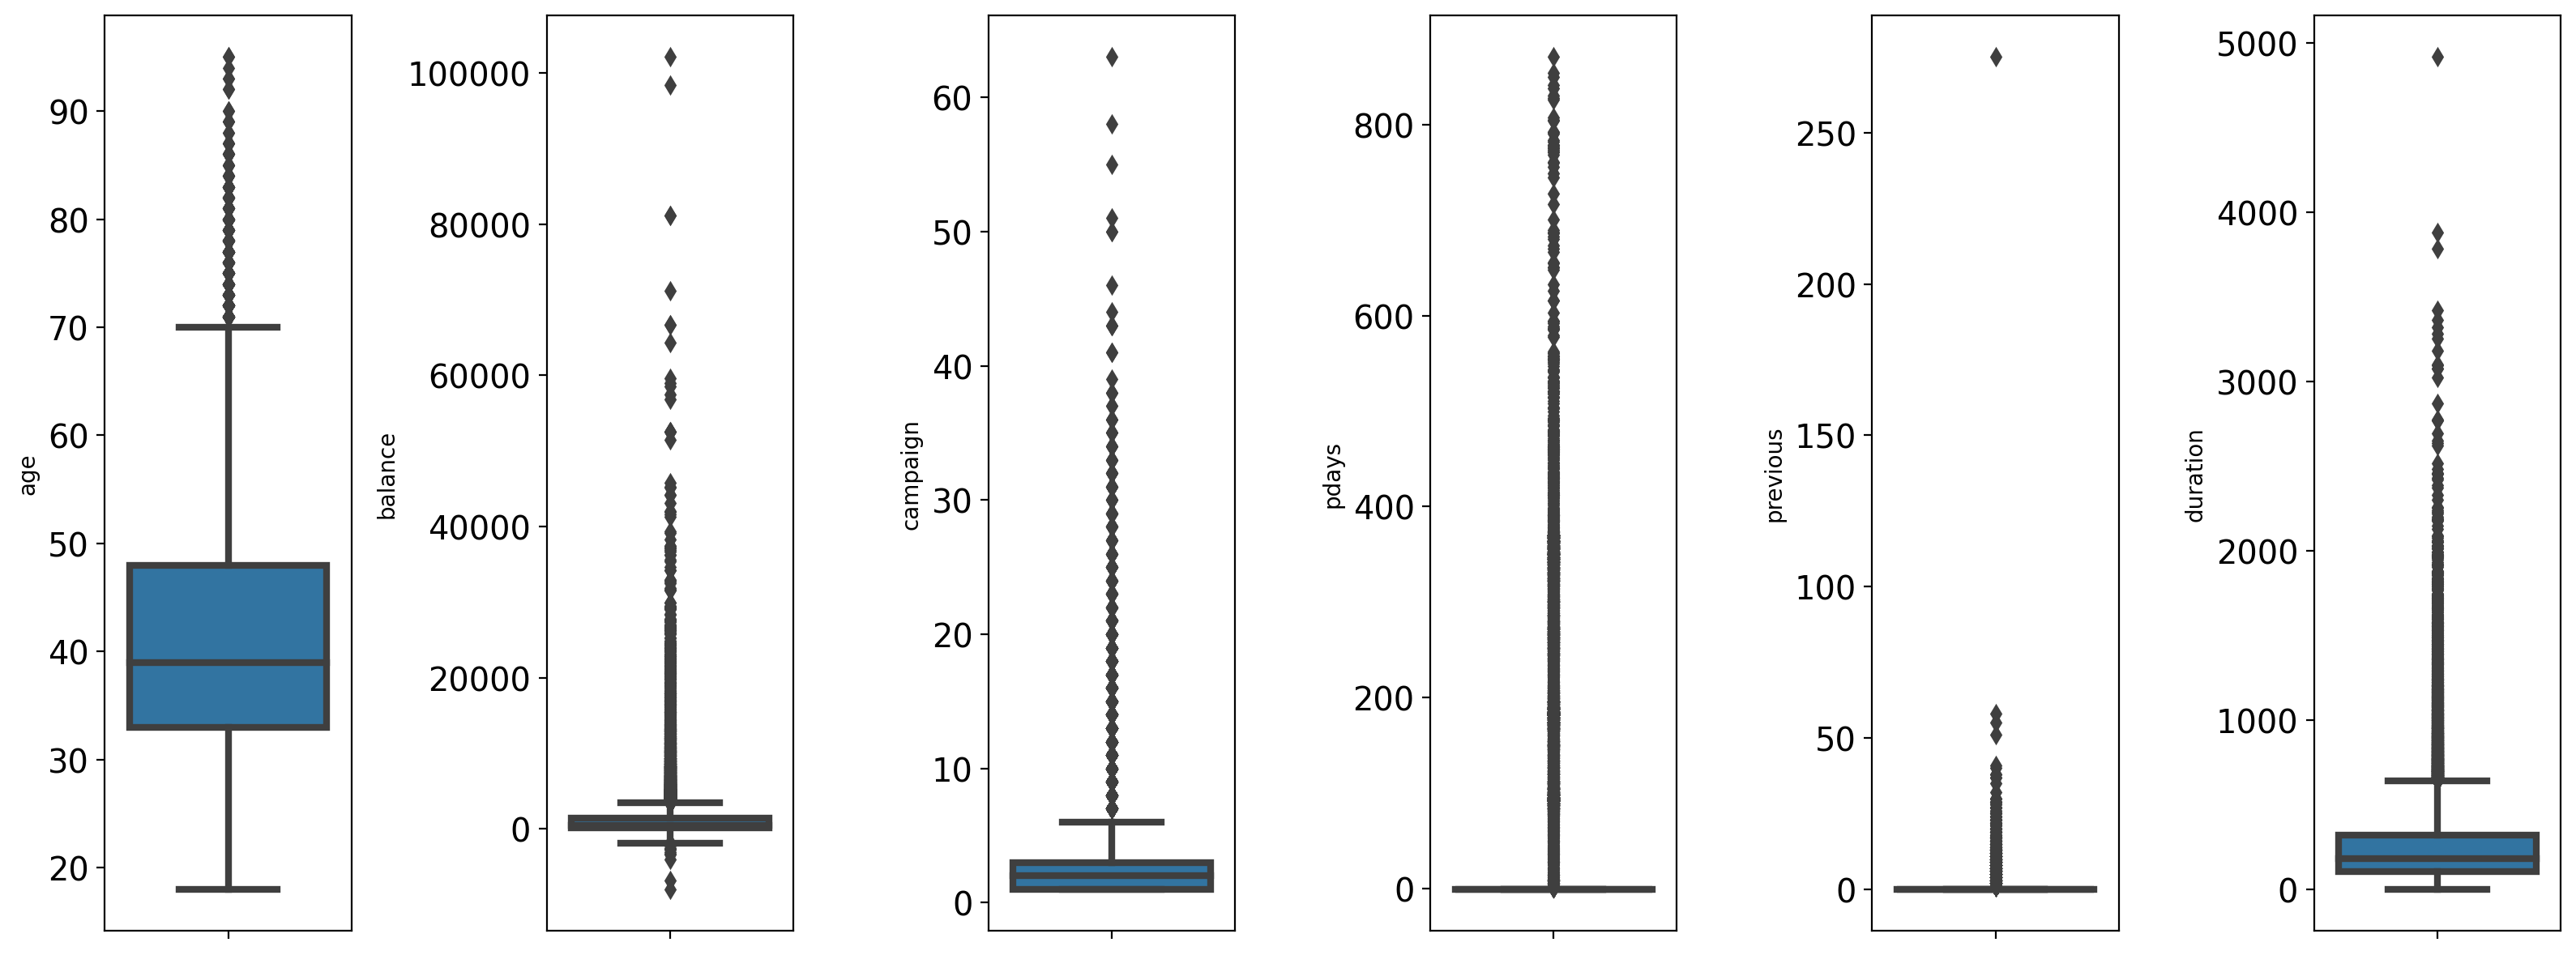

In [ ]:
plt.figure(figsize=(16,6),dpi=200)
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()
plt.savefig('boxplot_numerical.jpg')

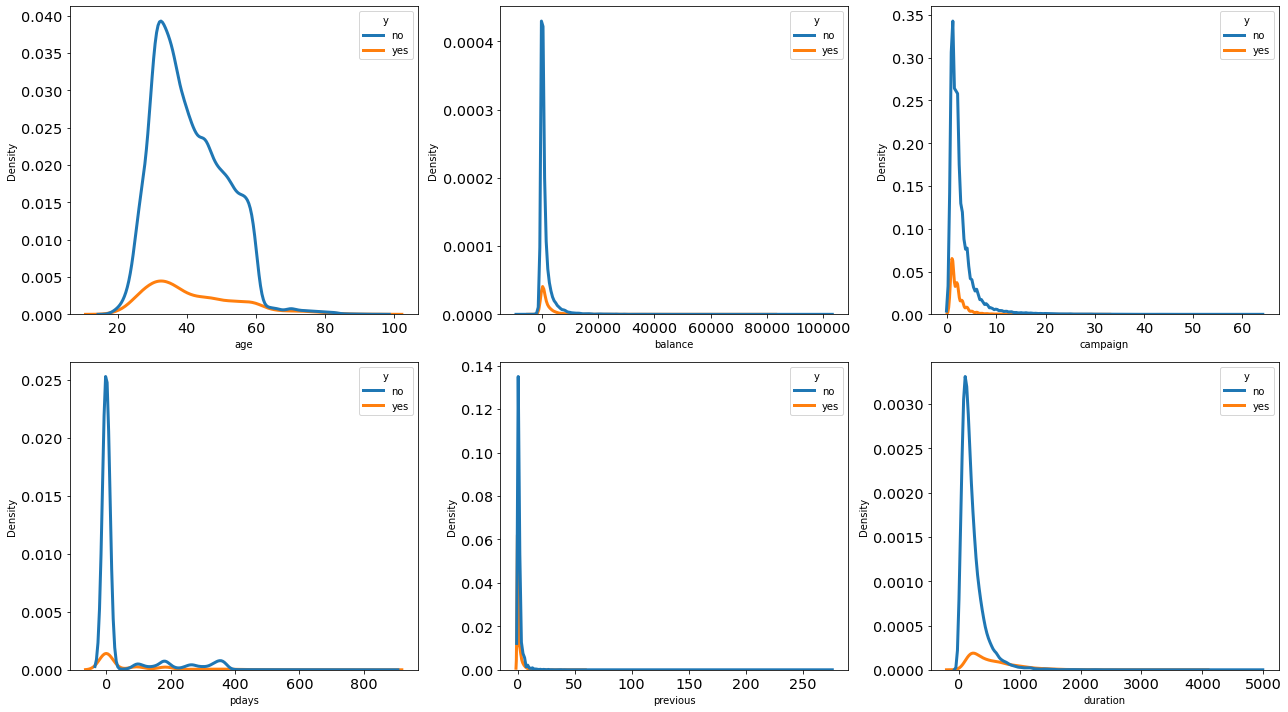

In [ ]:
plt.figure(figsize=(18,10))
for i in range(0,len(nums)):
    plt.subplot(2,3,i+1)
    sns.kdeplot(x=df[nums[i]],data=df,hue='y')
    plt.xlabel(nums[i])
    plt.tight_layout()
plt.savefig('plot_dist.jpg')

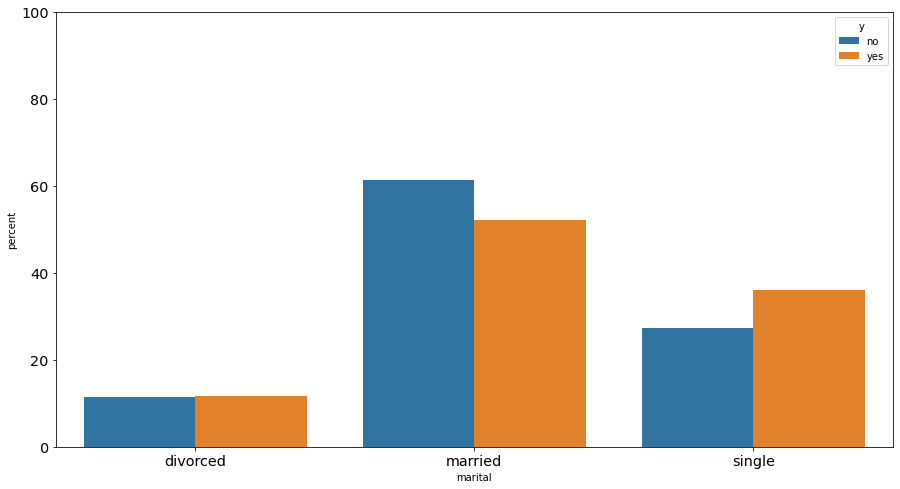

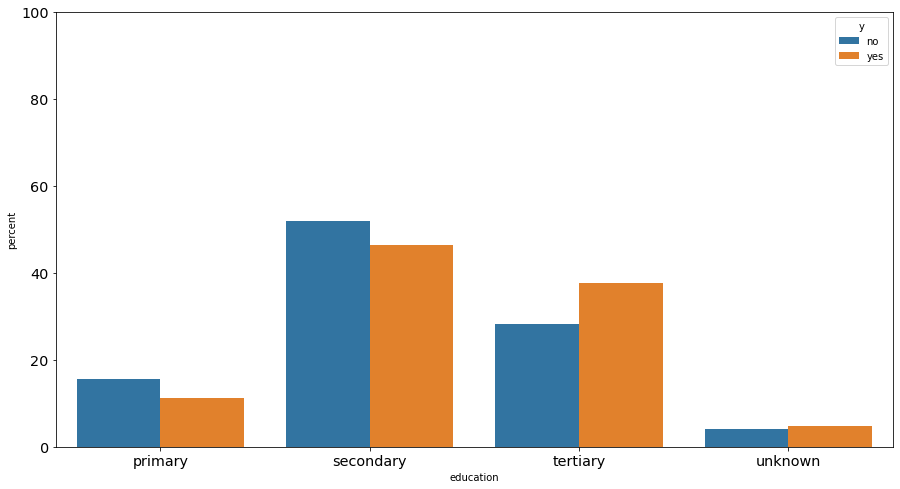

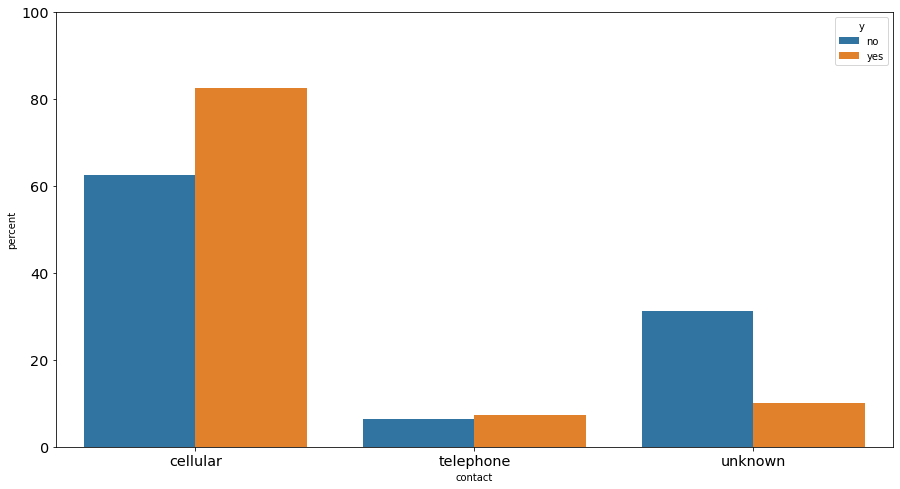

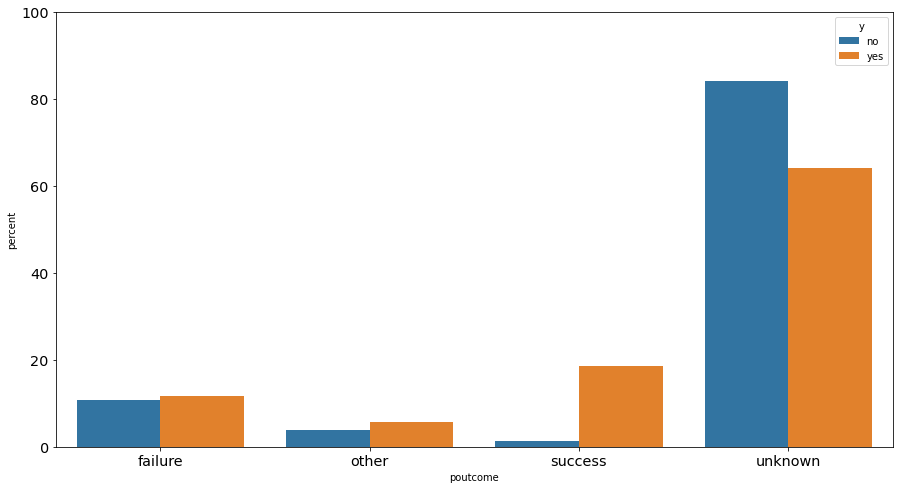

<Figure size 864x288 with 0 Axes>

In [ ]:
for i in  range(1, len(cats)):
    plt.figure(figsize=(15,8))
    dfa = df.groupby([cats[i],'y'])['age'].count().reset_index()
    dfa.columns = [cats[i],'y','total']
    dfa['percent'] = np.where(dfa['y']=='yes', dfa['total']/df[df['y']=='yes']['age'].count()*100,
                              dfa['total']/df[df['y']=='no']['age'].count()*100)
    ax = sns.barplot(y='percent',x=cats[i],data = dfa, hue = 'y')
    ax.set(ylim=(0, 100))
    plt.show()
plt.savefig('cats.jpg')

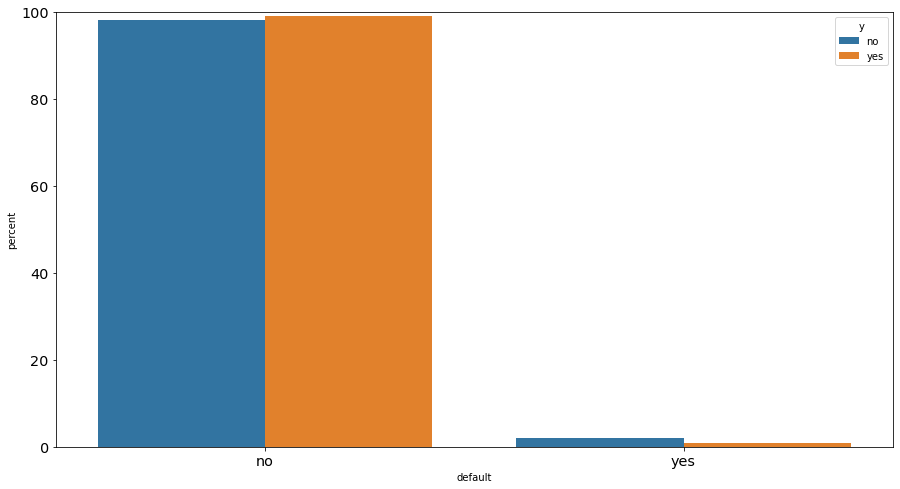

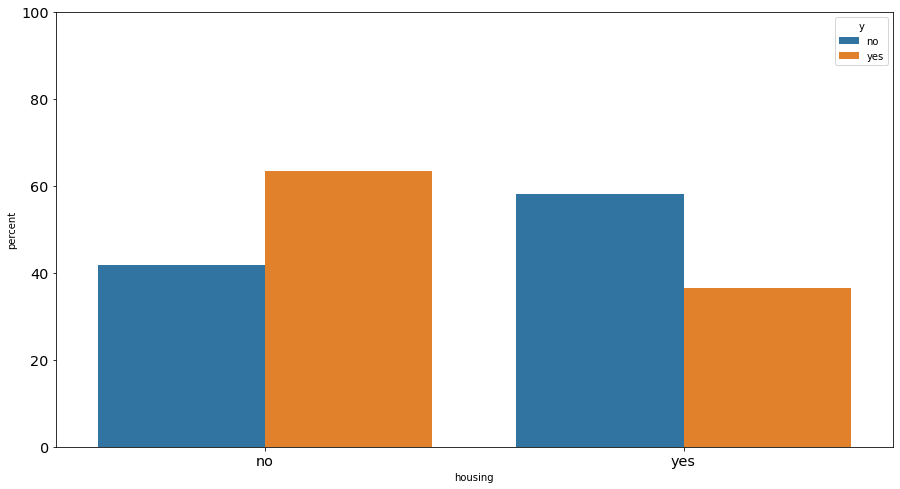

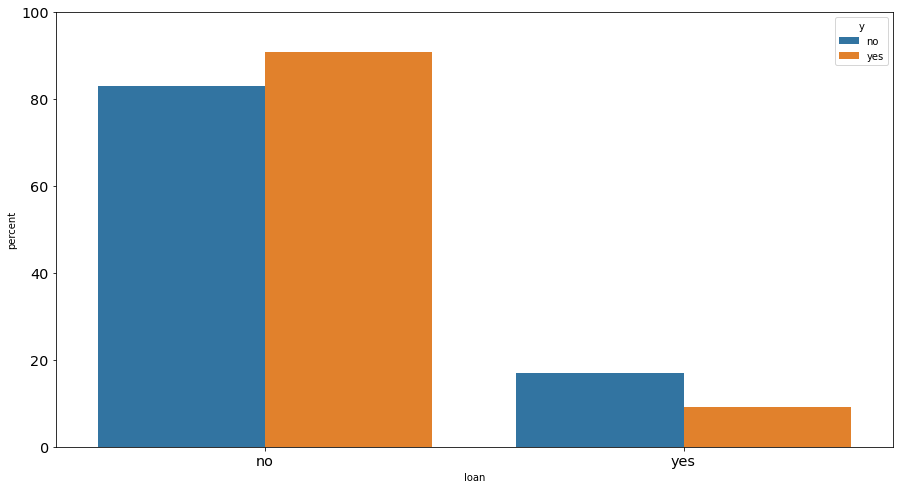

<Figure size 864x288 with 0 Axes>

In [ ]:
for i in  range(0, len(cats2)):
    plt.figure(figsize=(15,8))
    dfa = df.groupby([cats2[i],'y'])['age'].count().reset_index()
    dfa.columns = [cats2[i],'y','total']
    dfa['percent'] = np.where(dfa['y']=='yes', dfa['total']/df[df['y']=='yes']['age'].count()*100,
                              dfa['total']/df[df['y']=='no']['age'].count()*100)
    ax = sns.barplot(y='percent',x=cats2[i],data = dfa, hue = 'y')
    ax.set(ylim=(0, 100))
    plt.show()
plt.savefig('cats2.jpg')

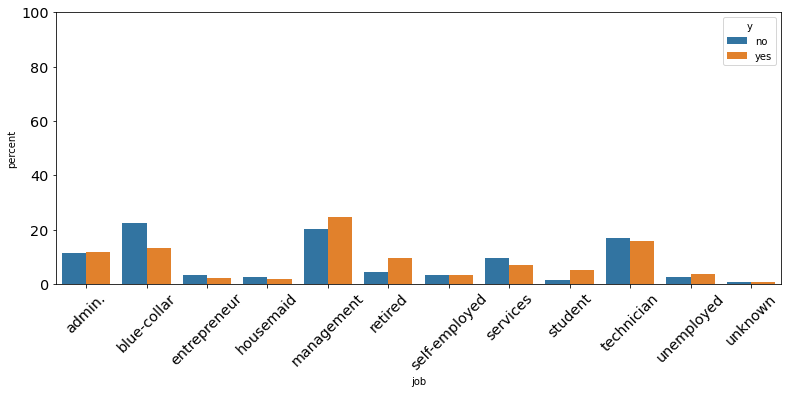

<Figure size 864x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(13,5))
dfa = df.groupby(['job','y'])['age'].count().reset_index()
dfa.columns = ['job','y','total']
dfa['percent'] = np.where(dfa['y']=='yes', dfa['total']/df[df['y']=='yes']['age'].count()*100,
                              dfa['total']/df[df['y']=='no']['age'].count()*100)
ax = sns.barplot(y='percent',x='job',data = dfa, hue = 'y')
plt.xticks(rotation = 45)
ax.set(ylim=(0, 100))
plt.show()
plt.savefig('job.jpg')

# Multivariate Analysis

In [ ]:
# Multivariate Analysis

# Business Insight

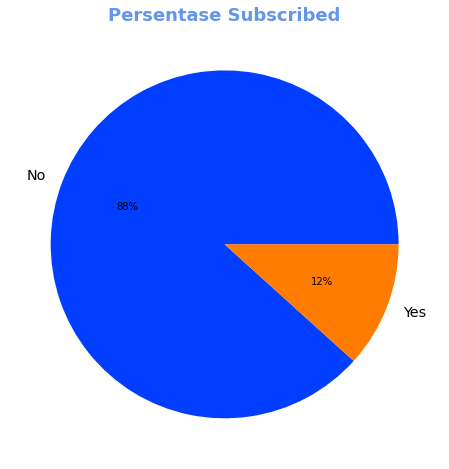

In [ ]:
data = [df[df['y']=='no']['y'].count(),df[df['y']=='yes']['y'].count()]
labels = ['No','Yes']

#define Seaborn color palette to use
colors = sns.color_palette('bright')[0:5]

#create pie chart
plt.figure(figsize=(10,8))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Persentase Subscribed',color='cornflowerblue',fontsize=18,fontweight='bold')
plt.show()

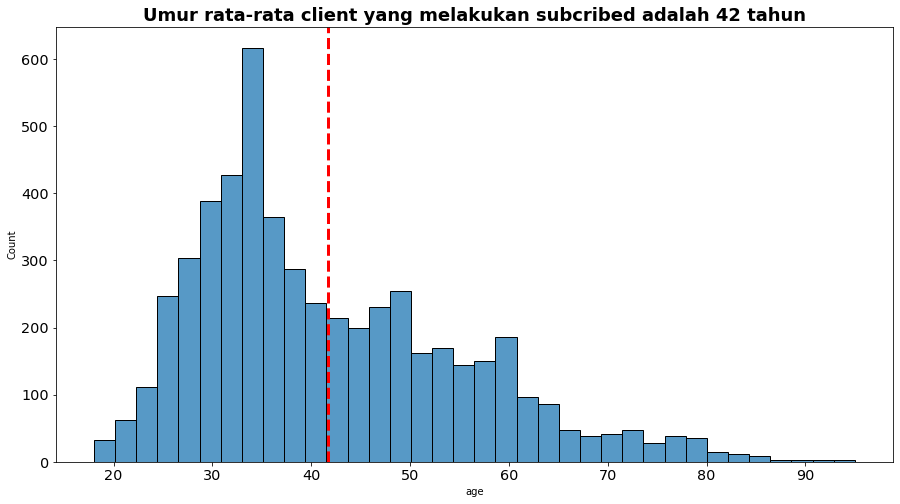

<Figure size 864x288 with 0 Axes>

In [ ]:
plt.subplots(figsize=(15,8))
sns.histplot(data=df[df['y']=='yes'][['age','y']], x="age")
plt.axvline(((df[df['y']=='yes'][['age']]).mean().reset_index()[0][0]), linestyle='--', color='red')
plt.title('Umur rata-rata client yang melakukan subcribed adalah 42 tahun', fontsize=18, fontweight='bold')
plt.show()
plt.savefig('bi1.jpg')

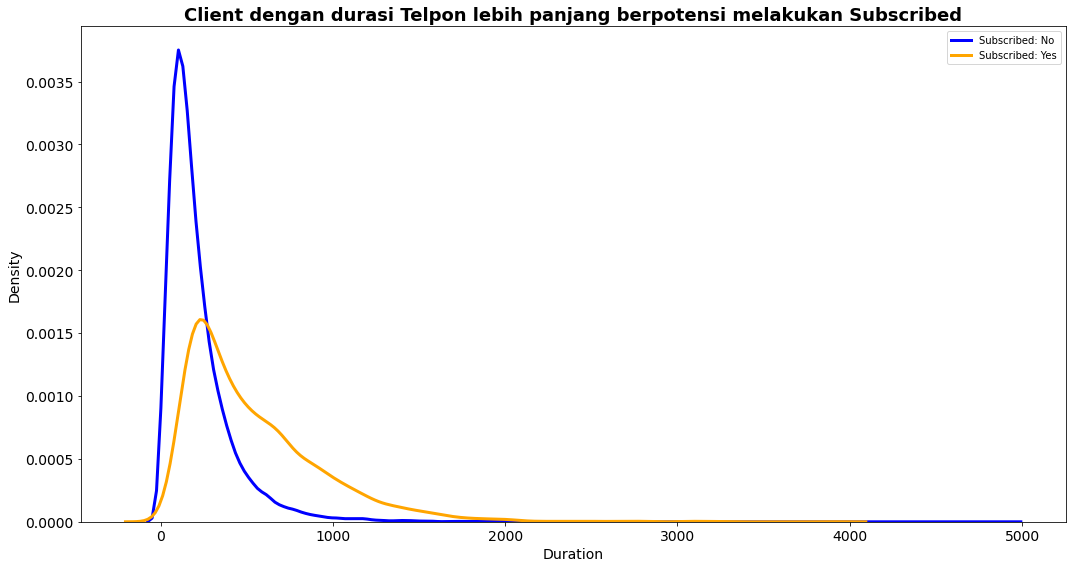

In [ ]:

fig, ax = plt.subplots(figsize=(15, 8))

sns.kdeplot(df[df['y']=='no']['duration'], color= 'blue', label= 'Subscribed: No', ax=ax)
sns.kdeplot(df[df['y']=='yes']['duration'], color= 'orange', label= 'Subscribed: Yes', ax=ax)

ax.set_title('Client dengan durasi Telpon lebih panjang berpotensi melakukan Subscribed',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Duration', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend()
plt.tight_layout()
plt.savefig('bi2.jpg')

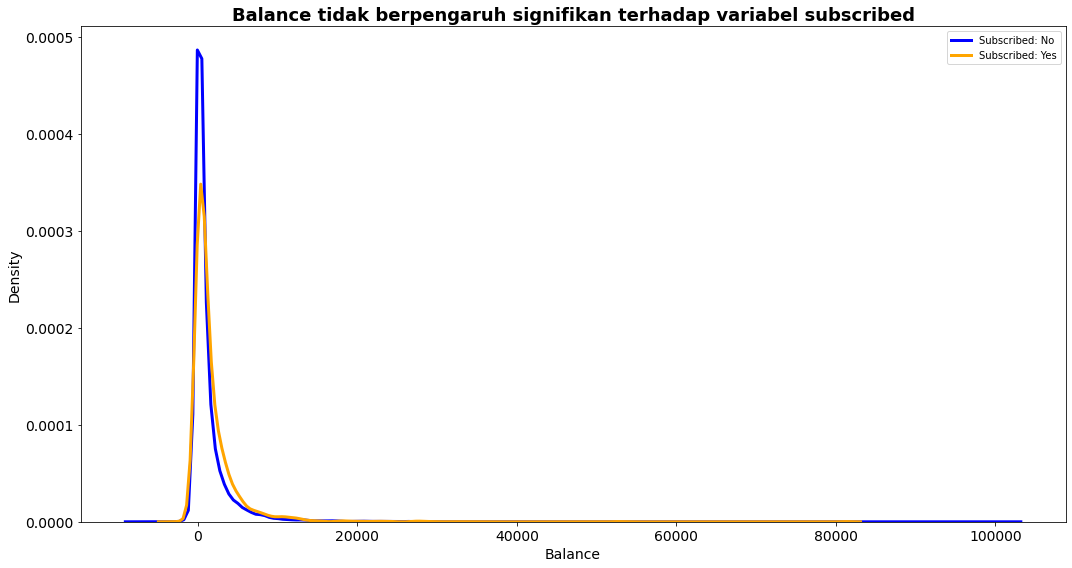

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df[df['y']=='no']['balance'], color= 'blue', label= 'Subscribed: No', ax=ax)
sns.kdeplot(df[df['y']=='yes']['balance'], color= 'orange', label= 'Subscribed: Yes', ax=ax)
ax.set_title('Balance tidak berpengaruh signifikan terhadap variabel subscribed',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Balance', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend()
plt.tight_layout()
plt.savefig('bi3.jpg')

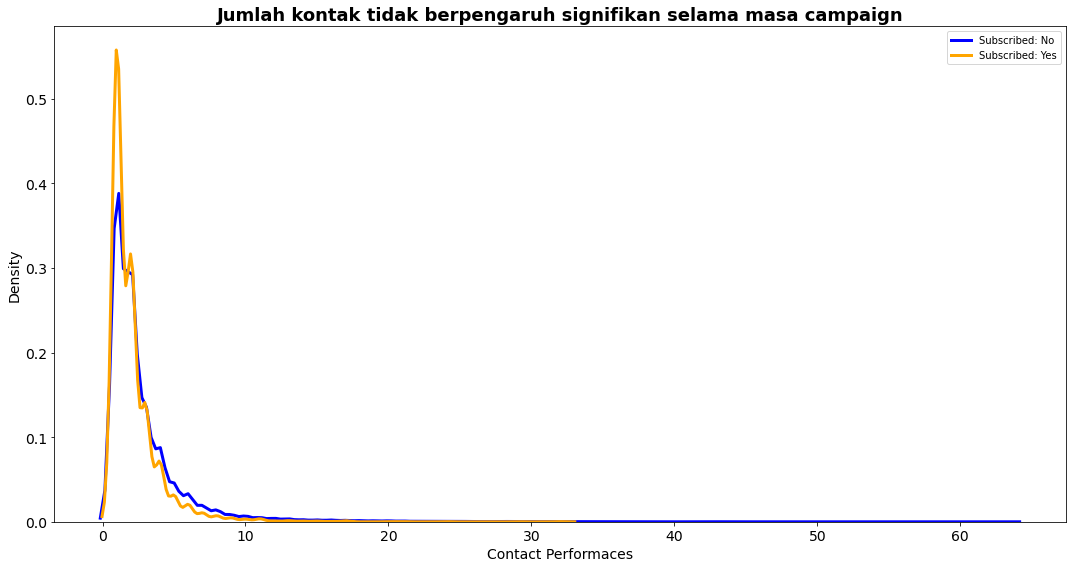

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df[df['y']=='no']['campaign'], color= 'blue', label= 'Subscribed: No', ax=ax)
sns.kdeplot(df[df['y']=='yes']['campaign'], color= 'orange', label= 'Subscribed: Yes', ax=ax)
ax.set_title('Jumlah kontak tidak berpengaruh signifikan selama masa campaign',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Contact Performaces', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend()
plt.tight_layout()
plt.savefig('bi4.jpg')

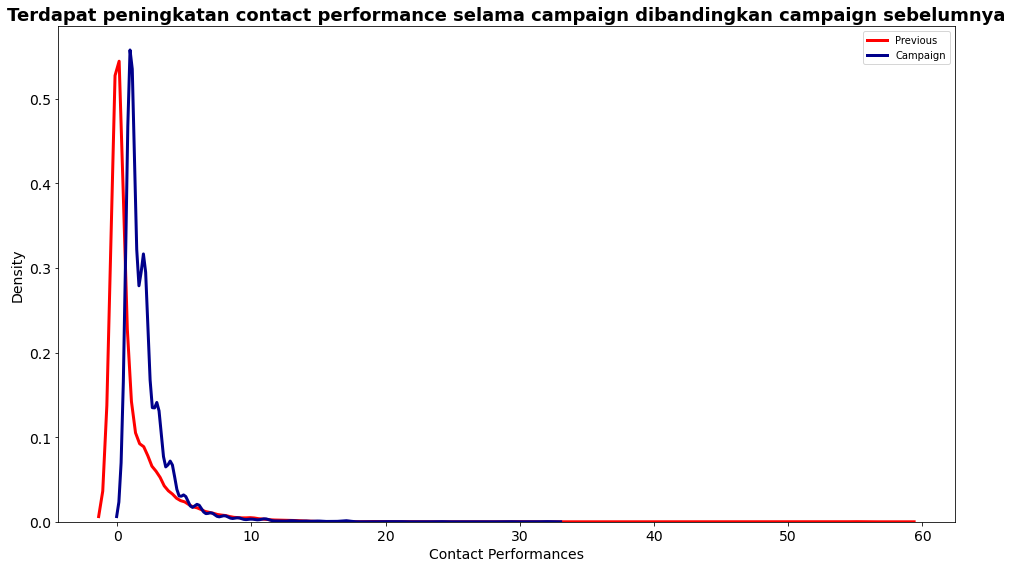

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.kdeplot(df[df['y']=='yes']['previous'], color= 'red', label= 'Previous', ax=ax)
sns.kdeplot(df[df['y']=='yes']['campaign'], color= 'darkblue', label= 'Campaign', ax=ax)
ax.set_title('Terdapat peningkatan contact performance selama campaign dibandingkan campaign sebelumnya',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Contact Performances', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend()
plt.tight_layout()
plt.savefig('bi5.jpg')

,Kredit-Pinjaman,y,New_ID_x,New_ID_y,Ratio
0,no-no,no,32685,37453,87.269378
1,no-no,yes,4768,37453,12.730622
2,no-yes,no,6474,6943,93.244995
3,no-yes,yes,469,6943,6.755005
4,yes-no,no,477,514,92.801556
5,yes-no,yes,37,514,7.198444
6,yes-yes,no,286,301,95.016611
7,yes-yes,yes,15,301,4.983389


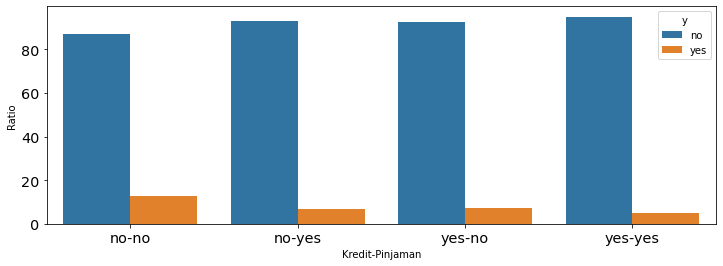

In [ ]:
df['Kredit-Pinjaman']=df['default']+'-'+df['loan']
df_dp2=df.groupby(['Kredit-Pinjaman','y'])['New_ID'].nunique().reset_index()
df_dp=df.groupby(['Kredit-Pinjaman',])['New_ID'].nunique().reset_index()
df_union_dp=df_dp2.merge(df_dp,on='Kredit-Pinjaman')
df_union_dp['Ratio']=df_union_dp['New_ID_x']*100/df_union_dp['New_ID_y']
sns.barplot(x="Kredit-Pinjaman", y="Ratio", data=df_union_dp, hue="y")
df_union_dp

,Con-Out,y,New_ID_x,New_ID_y,Ratio
0,0-unknown,no,33570,36954,90.842669
1,0-unknown,yes,3384,36954,9.157331
2,1-failure,no,4283,4901,87.390329
3,1-failure,yes,618,4901,12.609671
4,1-other,no,1533,1840,83.315217
5,1-other,yes,307,1840,16.684783
6,1-success,no,533,1511,35.274653
7,1-success,yes,978,1511,64.725347
8,1-unknown,no,3,5,60.000000
9,1-unknown,yes,2,5,40.000000


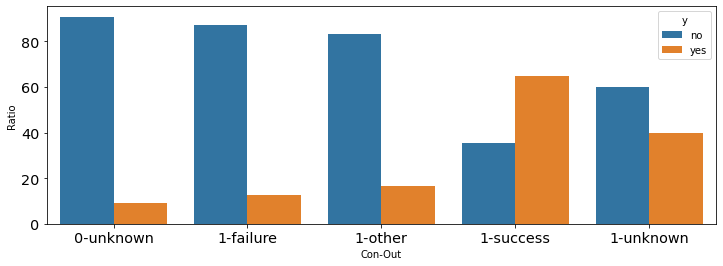

In [ ]:
df['contancted']=np.where(df['pdays']>0,1,0)
df['Con-Out']=df['contancted'].map(str)+'-'+df['poutcome']
df_dp2=df.groupby(['Con-Out','y'])['New_ID'].nunique().reset_index()
df_dp=df.groupby(['Con-Out',])['New_ID'].nunique().reset_index()
df_union_dp=df_dp2.merge(df_dp,on='Con-Out')
df_union_dp['Ratio']=df_union_dp['New_ID_x']*100/df_union_dp['New_ID_y']
sns.barplot(x="Con-Out", y="Ratio", data=df_union_dp, hue="y")
df_union_dp